In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.construct import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from random import *    
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
#Mutual information
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectPercentile
from sklearn.svm import NuSVC

df = pd.read_csv("kasMasterNew.csv",sep=';')
#print("data shape: ", df.shape)
#print("data head: ", df.head)

first_column = df.columns[0]
df = df.drop([first_column], axis=1)
feature_labels = df.columns
last = df.iloc[:,-1]
df = df.iloc[:, :-1]

X = df
y = np.ravel(last.to_numpy()
            )
#print("y: ", y)
#print("data X: ", X)
#print("features: ",feature_labels[:-1])

#X_t = df.to_numpy()
#yy = np.ravel(last.to_numpy())

X1, X_testEnd, y1, y_testEnd = train_test_split(X, y, test_size = 0.1)


#run mutual information til 60 % reduction
#sel = SelectPercentile(mutual_info_classif, percentile=20).fit(X1, y1)
#model = list()    
#X_t = sel.transform(X1)
X_t = X1.to_numpy()
from sklearn.svm import NuSVC
model = list()
features = list()

for x in range(1,2):
    folds = 6
    skf = StratifiedKFold(n_splits=folds, random_state=randint(1, 20000), shuffle=True, )
    skf.get_n_splits(X_t, y1)
    acc_score = []
    for train_index, test_index in skf.split(X_t, y1):
        X_train, X_test = X_t[train_index], X_t[test_index]
        y_train, y_test = y1[train_index], y1[test_index]
        
        scale = StandardScaler()
        scaler = scale.fit(X_train)
        
        X_train1 = scaler.transform(X_train)
        X_test1 = scaler.transform(X_test)
        
        estimator = SVC(kernel="linear")
        #estimator = SVC(kernel="linear", decision_function_shape='ovo', cache_size=200, class_weight={'Basal':1, 'Her2':1, 'LumA':1, 'LumB':1.3, 'Normal':1}, random_state=randint(1, 10000))
        selector = RFE(estimator, n_features_to_select=47, step=100)
        selector = selector.fit(X_train1, y_train)

        print("Support: ", selector.support_)
        print("Ranking", selector.ranking_)

        #from imblearn.over_sampling import SMOTE
        #oversample = SMOTE()
        X_test2, y_test2 = X_test1, y_test
        #X_test2, y_test2 = oversample.fit_resample(X_test1, y_test)

        X_train11 = pd.DataFrame(X_train1)
        X_test11 = pd.DataFrame(X_test2)

        f = selector.get_support(1)

        X_train = X_train11[X_train11.columns[f]]
        X_test = X_test11[X_test11.columns[f]]

        clf = SVC(kernel="linear", C = 0.1,decision_function_shape='ovo', class_weight = None, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        #print('Accuracy on test set: ')
        print(accuracy_score(y_test2, y_pred))
        print(confusion_matrix(y_test2,y_pred))
        print(classification_report(y_test2,y_pred))
        acc_score.append(accuracy_score(y_test2, y_pred))
        
        features.append(df[df.columns[f]])
    model.append(acc_score)
    print("Average score:", np.mean(acc_score))
    #model.append(acc_score)             
print("Model:", model)

Support:  [False False False ... False False False]
Ranking [ 28  31  36 ... 152 101 139]
0.8953488372093024
[[25  1  0  0  1]
 [ 0 10  0  2  1]
 [ 0  0 77  1  2]
 [ 0  1  4 25  0]
 [ 0  0  5  0 17]]
              precision    recall  f1-score   support

       Basal       1.00      0.93      0.96        27
        Her2       0.83      0.77      0.80        13
        LumA       0.90      0.96      0.93        80
        LumB       0.89      0.83      0.86        30
      Normal       0.81      0.77      0.79        22

    accuracy                           0.90       172
   macro avg       0.89      0.85      0.87       172
weighted avg       0.90      0.90      0.89       172

Support:  [False False False ... False False False]
Ranking [38 16 30 ... 60 42 70]
0.872093023255814
[[27  0  0  0  0]
 [ 0  9  0  3  0]
 [ 0  3 75  3  0]
 [ 0  0  7 23  0]
 [ 1  1  4  0 16]]
              precision    recall  f1-score   support

       Basal       0.96      1.00      0.98        27
        H

29
307
424
472
760
996
1055
1419
1501
2330
2681
2865
3040
3047
3717
4305
4369
5344
5884
7705
8007
8180
9290
10294
10447
10498
12553
13190
14403
Top doules features names:  ('TSLP', 'TPBG', 'TMPRSS6', 'TMEM215', 'TMEM194B', 'TEX19', 'STAC2', 'SMC4', 'RNF2', 'OLAH', 'IGF1R', 'HSPC159', 'GREB1', 'GPR160', 'F3', 'ECT2', 'DEFB1', 'DBC1', 'DACT2', 'CENPL', 'CDH3', 'CCDC6', 'C9orf170', 'C15orf23', 'C11orf90', 'AURKA')
Top doules weights:  (0.00039619609815925544, 0.0003374061498473796, 0.0003120288799849405, 0.00025269487057557173, 0.00025160895722852584, 0.00024835574106554163, 0.00022628650140593974, 0.00020527758467857107, 0.00020242199270629428, 0.00019669495620393984, 0.000168960037517759, 0.0001606098513524783, 0.00014736750565172603, 0.00014663264195679217, 0.00013824621763725893, 0.00012854100199157244, 0.00012845458000512857, 0.0001257382923934512, 0.00012320004353725107, 0.00011799214329355346, 0.0001039610140224426, 0.0001022882271914165, 9.482028235077989e-05, 9.356189050084267e-0

<ipython-input-28-449abc0c1a56>:84: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns_plot.set_xticklabels(labels= np.unique(dd).tolist(), rotation=90, fontsize=4)


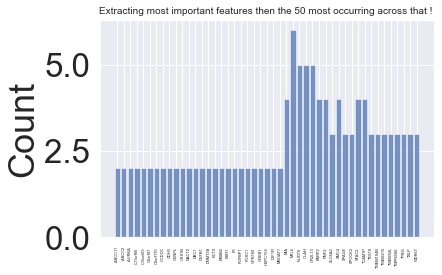

In [28]:
uniquelist = list()
allfeatures = list()
merged = list()
for i in features:
    allfeatures.append(i.columns)
for subset in allfeatures:
    for word in subset:
        merged.append(word)
    
unique = []
double = []
triple = []
final = []
for number in merged:   
    if number in unique:
        if number in double:
            final.append(number)
        else:
            double.append(number)       
    else:
        unique.append(number)
        
from numpy.core.fromnumeric import sort

#print(unique)
#print(final)
finish = final + double + double
#print(sort(finish))

morethan22 = []
morethan2 = 0
twoOrLess = 0
twoOrLesss = []
for number2 in np.unique(finish).tolist():   
    if (number2 in np.unique(final).tolist()):
        morethan22.append(number2)
        morethan2 = morethan2 + 1
    else:
        twoOrLess = twoOrLess + 1
        twoOrLesss.append(number2)


l = list()
indexNames = list()
newImp = list()

def f_importances(coef, names, top):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))
    for ind, colum in enumerate(df.columns):
        for name in twoOrLesss:  
            if colum == name:
                print(ind)
                #index = names.index(name)
                newImp.append(imp[ind])
                
    imp2, names2 = zip(*sorted(list(zip(newImp, twoOrLesss))))
    print("Top doules features names: ", names2[::-1][0:top])
    print("Top doules weights: ", imp2[::-1][0:top])
    l.append(names2[::-1][0:top])

clfAll = SVC(kernel="linear", C = 0.1,decision_function_shape='ovo', class_weight = None, random_state=42)
clfAll.fit(X, y)

absCoef = abs(clfAll.coef_)
absAverageCoef = absCoef.mean(axis=0)
f_importances(absAverageCoef, feature_labels, top=(47 - morethan2))

allFinalF = list()
more = list()

for jj in l[0]:
    allFinalF.append(jj)
    allFinalF.append(jj)

for ee in finish:
    if ee in final:
        more.append(ee) 

dd = allFinalF + more       

import seaborn as sns
sns_plot = sns.histplot(data=dd, shrink=.8)
sns_plot.set_xticklabels(labels= np.unique(dd).tolist(), rotation=90, fontsize=4)
sns_plot.set_title('Extracting most important features then the 50 most occurring across that ! ', fontsize=10)
sns_plot.figure.savefig('features5-333366.png', bbox_inches='tight', dpi=500)

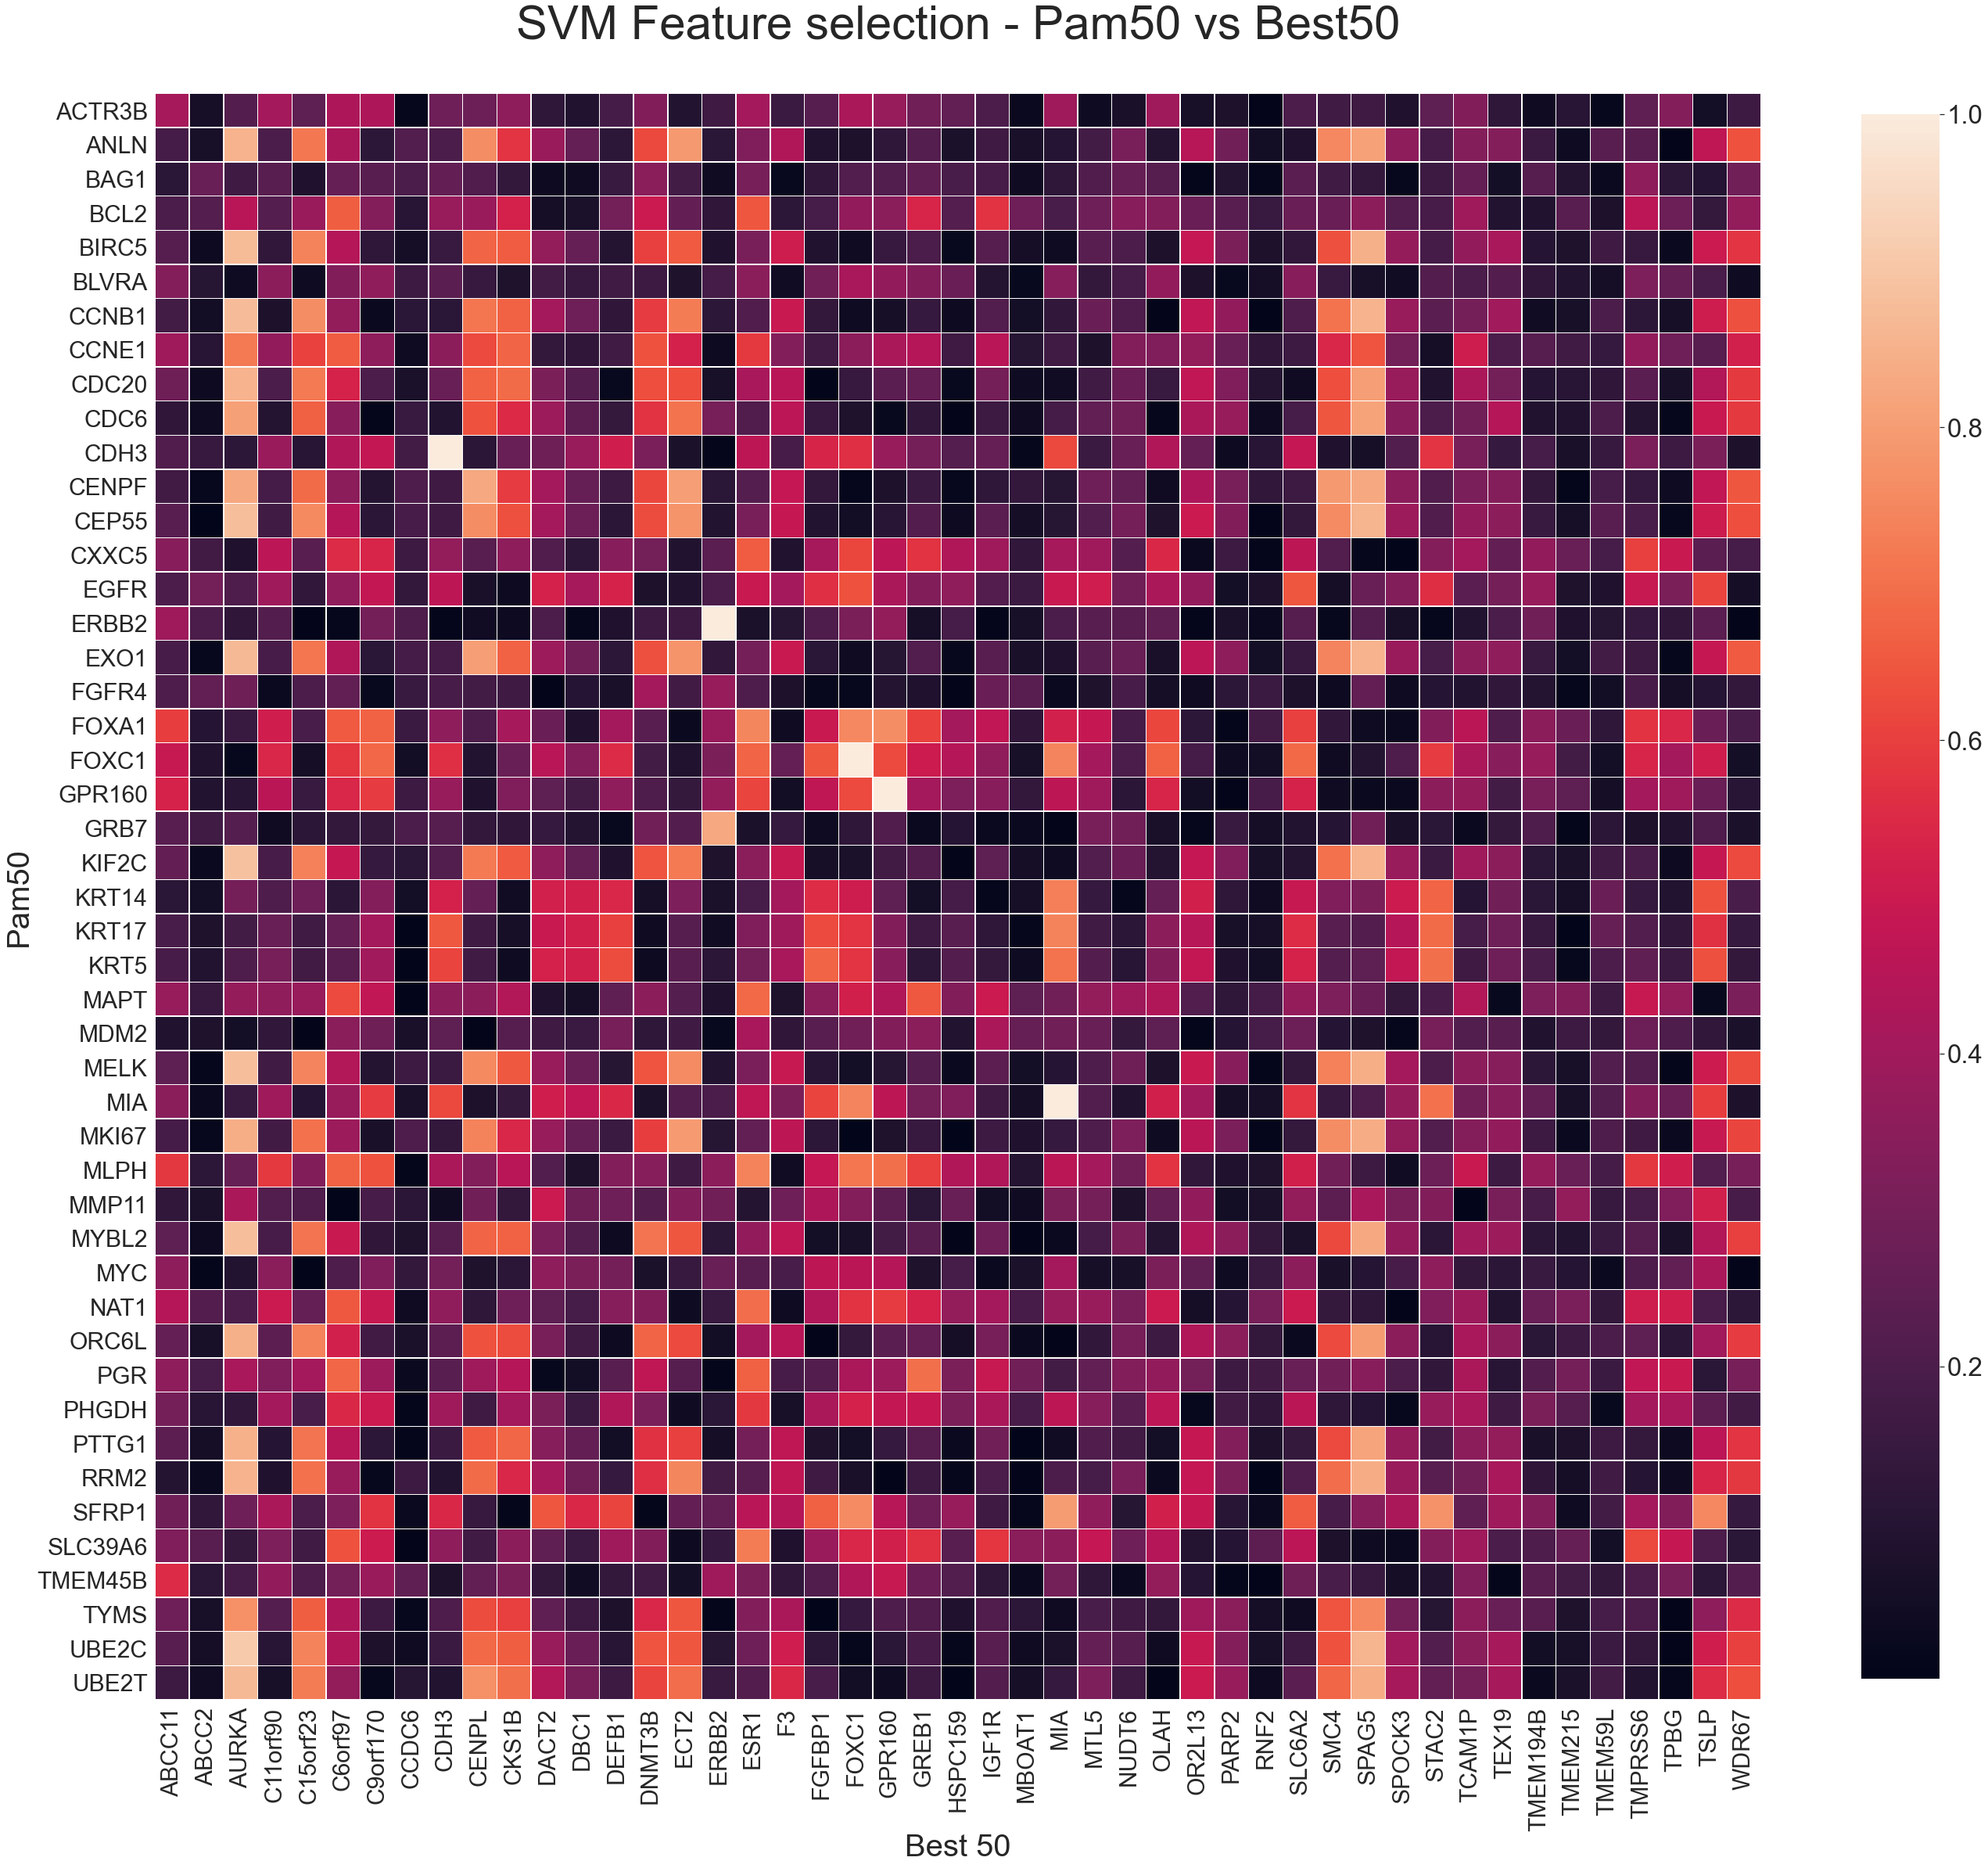

<Figure size 432x288 with 0 Axes>

In [29]:
pam50 = ['ACTR3B','ANLN','BAG1','BCL2','BIRC5','BLVRA','CCNB1','CCNE1','CDC20','CDC6',
'CDH3','CENPF','CEP55','CXXC5','EGFR','ERBB2','EXO1','FGFR4','FOXA1',
'FOXC1','GPR160','GRB7','KIF2C','KRT14','KRT17','KRT5','MAPT','MDM2','MELK',
'MIA','MKI67','MLPH','MMP11','MYBL2','MYC','NAT1','ORC6L','PGR','PHGDH','PTTG1','RRM2',
'SFRP1','SLC39A6','TMEM45B','TYMS','UBE2C','UBE2T']

# not in out data set : ['SR1', 'KNTC2', 'CDCA1'] so deleted from pam 50.

best50 = df[np.unique(dd).tolist()] # of latest best features
p = df[pam50]

from numpy.random import seed
from scipy.stats import pearsonr

# seed random number generator
seed(1)
# prepare data
#best50 = best50.iloc[:, 0:2]
#p = p.iloc[:, 0:2]
ll = list()
# calculate Pearson's correlation
col = list()
for ind, colum in enumerate(best50.columns):
    #corr, _ = pearsonr(p.columns[ind], column)
    #l.appende(corr)
    for ins, column in enumerate(p.columns):
        #print(colum)
        #print(column)
        #print(p.columns[ind])
        #print(ind)
        #print(best50.columns[ins])
        #print(ins)
        corr, _ = pearsonr(p[column], best50[colum])
        #print(abs(corr))
        col.append(abs(corr))
    ll.append(col)
    col=[] 
#print(l)  

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

fig, ax = plt.subplots(figsize=(46, 46))
#plt.xlabel(best50.columns)
#plt.ylabel(p.columns)

#fig.title('Pearson Absolute Values', fontsize=40)

x_axis_labels = best50.columns.to_numpy() # labels for x-axis
y_axis_labels =  p.columns.to_numpy()# labels for y-axis

# create seabvorn heatmap with required labels
b = sb.heatmap(np.array(ll).T.tolist(),  xticklabels=x_axis_labels, yticklabels=y_axis_labels,
           linewidth=0.4, cbar_kws={"shrink": .8}, fmt=".2f",square=True)
b.axes.set_title("SVM Feature selection - Pam50 vs Best50\n ",fontsize=60)
b.set_xlabel("Best 50",fontsize=40)
b.set_ylabel("Pam50",fontsize=40)
b.tick_params(labelsize=30)
sb.set(font_scale=3)
plt.show()
plt.savefig('HeatMap-Pam50vsFeatureSelectionBest50-166.jpg',dpi=400)

[[ 35   0   0   0   2]
 [  0  12   0   2   1]
 [  0   0 101   3   3]
 [  0   0   3  37   0]
 [  1   0   1   0  28]]
[[ 35   0   0   0   1]
 [  0  16   0   0   0]
 [  0   1 101   4   0]
 [  0   1   5  35   0]
 [  0   0   1   0  29]]
[[ 34   0   0   1   1]
 [  0  16   0   0   0]
 [  0   1 100   5   0]
 [  0   0   8  33   0]
 [  1   1   1   0  27]]
[[ 36   0   0   0   0]
 [  0  16   0   0   0]
 [  0   0 101   5   1]
 [  0   0   1  40   0]
 [  0   0   2   0  27]]
[[ 36   1   0   0   0]
 [  1  14   0   0   0]
 [  0   1 103   2   1]
 [  0   1   3  36   0]
 [  1   1   1   0  26]]
Average score: 0.9388148318394238
[[ 37   0   0   0   0]
 [  0  12   0   3   0]
 [  0   0 101   4   2]
 [  0   2   3  35   0]
 [  0   1   3   0  26]]
[[ 36   0   0   0   0]
 [  0  15   0   0   1]
 [  0   0 102   2   2]
 [  0   2   6  33   0]
 [  0   0   0   0  30]]
[[ 35   1   0   0   0]
 [  0  16   0   0   0]
 [  0   0 102   4   0]
 [  0   0   6  35   0]
 [  1   0   1   0  28]]
[[ 35   0   0   0   1]
 [  0  15   0  

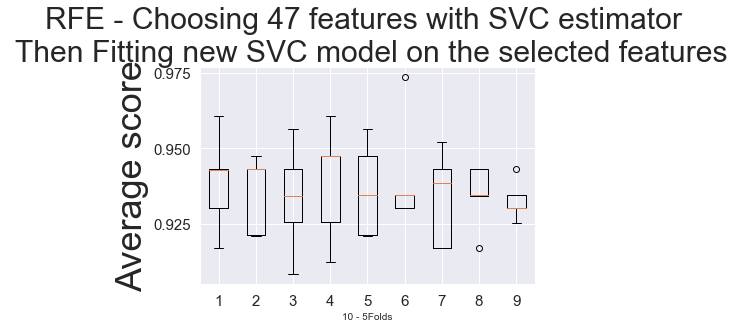

In [36]:

model = list()
X_t=df[np.unique(dd)].to_numpy()
for x in range(1,10):
    folds = 5
    skf = StratifiedKFold(n_splits=folds, random_state=randint(1, 1000), shuffle=True, )
    skf.get_n_splits(X_t, y)
    acc_score = []
    for train_index, test_index in skf.split(X_t, y):
        X_train, X_test = X_t[train_index], X_t[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        scale = StandardScaler()
        scaler = scale.fit(X_train)
        
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        clf=SVC(kernel="linear", C = 0.1,decision_function_shape='ovo', class_weight = None,random_state=1)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        #print('Accuracy on test set: ')
        #print(accuracy_score(y_test2, y_pred))
        print(confusion_matrix(y_test,y_pred))
        #print(classification_report(y_test2,y_pred))
        
        acc_score.append(accuracy_score(y_test, y_pred))
    model.append(acc_score)
    print("Average score:", np.mean(acc_score))
    #model.append(acc_score)             

print("Model:", model)
plt.boxplot(model)
plt.title('RFE - Choosing 47 features with SVC estimator \n Then Fitting new SVC model on the selected features',fontsize=30)
plt.xlabel('10 - 5Folds',fontsize=10)
plt.ylabel('Average score',)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("SVC-RFE-47-features-ovo-21-5.png",dpi=500)
plt.show()

In [2]:
import numpy as np
np.mean([[0.9301310043668122, 0.9432314410480349, 0.9170305676855895, 0.9606986899563319, 0.9429824561403509], [0.9213973799126638, 0.9432314410480349, 0.9432314410480349, 0.9475982532751092, 0.9210526315789473], [0.925764192139738, 0.9432314410480349, 0.9563318777292577, 0.9082969432314411, 0.9342105263157895], [0.9606986899563319, 0.9475982532751092, 0.925764192139738, 0.9475982532751092, 0.9122807017543859], [0.9475982532751092, 0.9344978165938864, 0.9213973799126638, 0.9563318777292577, 0.9210526315789473], [0.9344978165938864, 0.9301310043668122, 0.9344978165938864, 0.9301310043668122, 0.9736842105263158], [0.9432314410480349, 0.9170305676855895, 0.9519650655021834, 0.9170305676855895, 0.9385964912280702], [0.9432314410480349, 0.9432314410480349, 0.9170305676855895, 0.9344978165938864, 0.9342105263157895], [0.9301310043668122, 0.9344978165938864, 0.9432314410480349, 0.9301310043668122, 0.9254385964912281]])

0.9359925772704445